<a href="https://colab.research.google.com/github/navaneethkomuravelli/explainable_Ai_2374/blob/main/ex_ai_pratical_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.problem

,TV_Ads,Cars_Sold
0,1,14.5
1,3,22.5
2,7,43.5
3,6,35.0
4,9,51.5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,TV_Ads,Cars_Sold,Predicted,SHAP_TV_Ads,Baseline
0,1,14.5,13.676471,-19.723529,33.4
1,3,22.5,23.068627,-10.331373,33.4
2,7,43.5,41.852941,8.452941,33.4
3,6,35.0,37.156863,3.756863,33.4
4,9,51.5,51.245098,17.845098,33.4


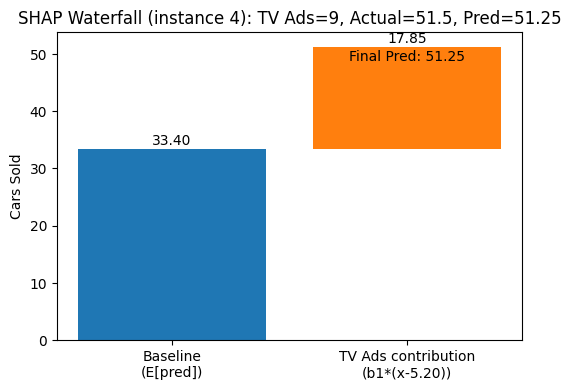

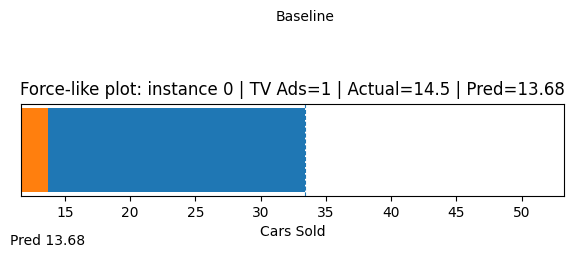

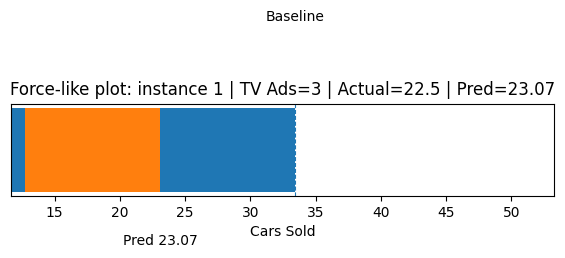

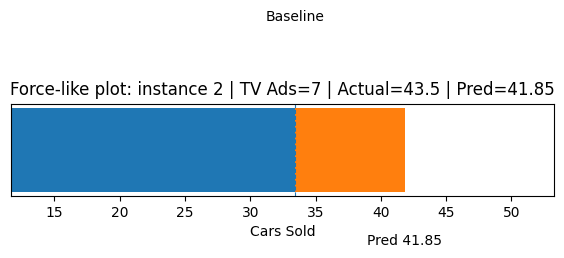

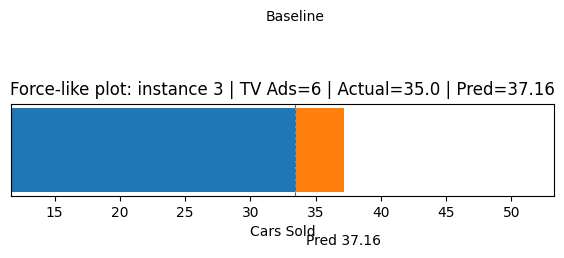

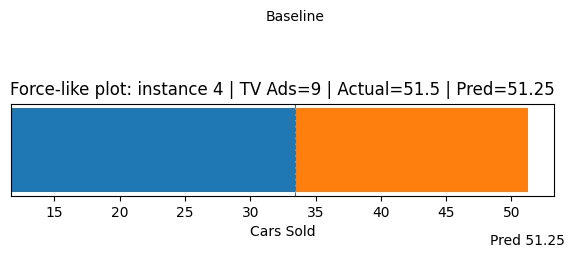

Linear model equation: y = b0 + b1*x
  b0 (intercept) = 8.9804
  b1 (slope)     = 4.6961
Prediction for x = 10 TV ads: y_pred = 55.94
Mean TV ads (E[x]) = 5.20
Baseline (E[prediction]) = 33.4000


In [23]:
#Problem 1

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

np.random.seed(0)
x = np.array([1, 3, 7, 6, 9])
y = (4.5 * x + 10) + np.array([0, -1, 2, -2, 1])

df = pd.DataFrame({
    "TV_Ads": x,
    "Cars_Sold": y
})

display(df)

model = LinearRegression()
model.fit(df[["TV_Ads"]], df["Cars_Sold"])
b1 = float(model.coef_[0])
b0 = float(model.intercept_)

x_pred = 10
y_pred = model.predict([[x_pred]])[0]

mean_x = df["TV_Ads"].mean()
baseline = b0 + b1 * mean_x
shap_values = b1 * (df["TV_Ads"] - mean_x)
predictions = b0 + b1 * df["TV_Ads"]

results = df.copy()
results["Predicted"] = predictions
results["SHAP_TV_Ads"] = shap_values
results["Baseline"] = baseline

display(results)


i = len(df) - 1
xi = df.loc[i, "TV_Ads"]
yi = df.loc[i, "Cars_Sold"]
shap_i = shap_values[i]
pred_i = predictions[i]

fig, ax = plt.subplots(figsize=(6,4))
parts = [baseline, shap_i]
labels = ["Baseline\n(E[pred])", f"TV Ads contribution\n(b1*(x-{mean_x:.2f}))"]

xpos = np.arange(len(parts))
cumul = np.array([baseline, baseline + shap_i])
ax.bar(0, baseline)
ax.bar(1, shap_i, bottom=baseline)
ax.set_xticks([0,1])
ax.set_xticklabels(labels)
ax.set_ylabel("Cars Sold")
ax.set_title(f"SHAP Waterfall (instance {i}): TV Ads={xi}, Actual={yi}, Pred={pred_i:.2f}")

ax.text(0, baseline + 0.2, f"{baseline:.2f}", ha="center", va="bottom")
ax.text(1, baseline + shap_i + 0.2 if shap_i>=0 else baseline + 0.2, f"{shap_i:.2f}", ha="center", va="bottom")
ax.text(1, baseline + shap_i - 0.6, f"Final Pred: {pred_i:.2f}", ha="center", va="top")

plt.show()

for idx in range(len(df)):
    xi = df.loc[idx, "TV_Ads"]
    yi = df.loc[idx, "Cars_Sold"]
    shap_i = shap_values[idx]
    pred_i = predictions[idx]

    fig, ax = plt.subplots(figsize=(7,1.2))
    ax.barh(0, baseline, height=0.4)
    ax.barh(0, shap_i, left=baseline if shap_i>=0 else baseline+shap_i, height=0.4)

    ax.set_xlim(min(baseline + shap_values.min(), baseline) - 2, max(baseline + shap_values.max(), baseline) + 2)
    ax.set_yticks([])
    ax.set_xlabel("Cars Sold")
    ax.set_title(f"Force-like plot: instance {idx} | TV Ads={xi} | Actual={yi} | Pred={pred_i:.2f}")
    ax.axvline(baseline, linestyle="--", linewidth=0.8)
    ax.text(baseline, 0.6, "Baseline", ha="center", va="bottom")
    ax.text(baseline + shap_i, -0.4, f"Pred {pred_i:.2f}", ha="center", va="top")

    plt.show()

print("Linear model equation: y = b0 + b1*x")
print(f"  b0 (intercept) = {b0:.4f}")
print(f"  b1 (slope)     = {b1:.4f}")
print(f"Prediction for x = {x_pred} TV ads: y_pred = {y_pred:.2f}")
print(f"Mean TV ads (E[x]) = {mean_x:.2f}")
print(f"Baseline (E[prediction]) = {baseline:.4f}")


2.problem

,IQ,Study_Hours,Test_Score
0,75,10,74.5
1,80,15,79.5
2,90,25,103.5
3,100,30,113.0
4,105,35,128.0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,IQ,Study_Hours,Test_Score,Predicted,SHAP_IQ,SHAP_StudyHours,Baseline
0,75,10,74.5,71.854839,-4.403226,-23.441935,99.7
1,80,15,79.5,82.338710,-2.935484,-14.425806,99.7
2,90,25,103.5,103.306452,0.000000,3.606452,99.7
3,100,30,113.0,115.258065,2.935484,12.622581,99.7
4,105,35,128.0,125.741935,4.403226,21.638710,99.7


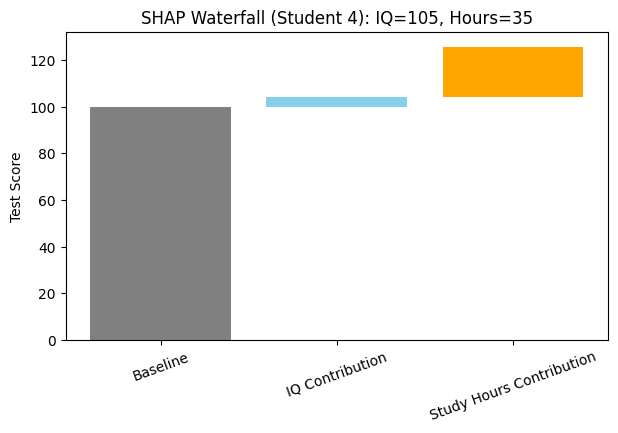

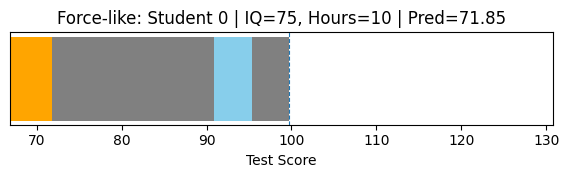

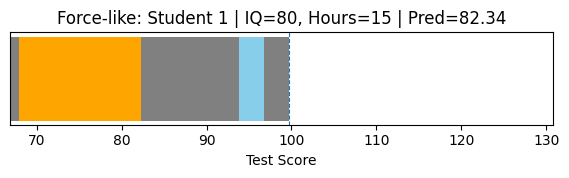

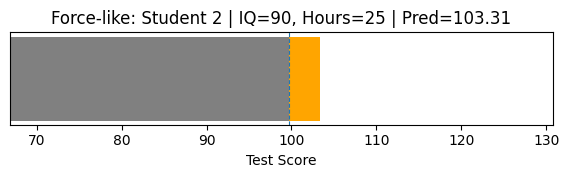

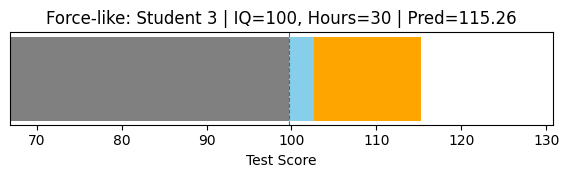

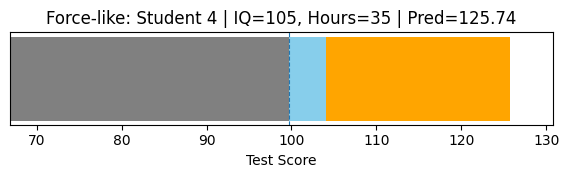

Multiple Linear Regression Equation:
  Test_Score = 31.8065 + (0.2935 * IQ) + (1.8032 * Study_Hours)
Prediction for IQ=95, Hours=25: 104.77
Baseline (E[pred]) = 99.7000


In [24]:
# Problem 2: Multiple Linear Regression with SHAP for IQ and Study Hours

np.random.seed(1)
IQ = np.array([75, 80, 90, 100, 105])
Study_Hours = np.array([10, 15, 25, 30, 35])
Test_Score = 0.5*IQ + 1.5*Study_Hours + 20 + np.array([2, -3, 1, -2, 3])

df2 = pd.DataFrame({
    "IQ": IQ,
    "Study_Hours": Study_Hours,
    "Test_Score": Test_Score
})

display(df2)

model2 = LinearRegression()
model2.fit(df2[["IQ", "Study_Hours"]], df2["Test_Score"])
coef_IQ, coef_Hours = model2.coef_
intercept2 = model2.intercept_

x_pred2 = np.array([[95, 25]])
y_pred2 = model2.predict(x_pred2)[0]

mean_IQ = df2["IQ"].mean()
mean_Hours = df2["Study_Hours"].mean()
baseline2 = intercept2 + coef_IQ*mean_IQ + coef_Hours*mean_Hours

shap_IQ = coef_IQ * (df2["IQ"] - mean_IQ)
shap_Hours = coef_Hours * (df2["Study_Hours"] - mean_Hours)

predictions2 = baseline2 + shap_IQ + shap_Hours

results2 = df2.copy()
results2["Predicted"] = predictions2
results2["SHAP_IQ"] = shap_IQ
results2["SHAP_StudyHours"] = shap_Hours
results2["Baseline"] = baseline2

display(results2)

idx_wf = len(df2) - 1
fig, ax = plt.subplots(figsize=(7,4))
parts = [baseline2, shap_IQ[idx_wf], shap_Hours[idx_wf]]
labels = ["Baseline", "IQ Contribution", "Study Hours Contribution"]
colors = ["gray", "skyblue", "orange"]

current_val = baseline2
for i, (label, value, color) in enumerate(zip(labels, parts, colors)):
    if i == 0:
        ax.bar(i, value, color=color)
    else:
        ax.bar(i, value, bottom=current_val, color=color)
        current_val += value

ax.set_xticks(range(len(parts)))
ax.set_xticklabels(labels, rotation=20)
ax.set_ylabel("Test Score")
ax.set_title(f"SHAP Waterfall (Student {idx_wf}): IQ={df2.loc[idx_wf,'IQ']}, Hours={df2.loc[idx_wf,'Study_Hours']}")
plt.show()

for idx in range(len(df2)):
    fig, ax = plt.subplots(figsize=(7,1.2))
    ax.barh(0, baseline2, height=0.4, color="gray")
    contrib_sum = shap_IQ[idx] + shap_Hours[idx]

    left_pos = baseline2 if shap_IQ[idx] >= 0 else baseline2 + shap_IQ[idx]
    ax.barh(0, shap_IQ[idx], left=left_pos, height=0.4, color="skyblue")

    left_pos = baseline2 + (shap_IQ[idx] if shap_IQ[idx] >= 0 else 0)
    if shap_Hours[idx] >= 0:
        ax.barh(0, shap_Hours[idx], left=baseline2 + shap_IQ[idx], height=0.4, color="orange")
    else:
        ax.barh(0, shap_Hours[idx], left=baseline2 + shap_IQ[idx] + shap_Hours[idx], height=0.4, color="orange")

    pred_val = predictions2[idx]
    ax.set_xlim(min(baseline2 + (shap_IQ+shap_Hours).min(), baseline2) - 5,
                max(baseline2 + (shap_IQ+shap_Hours).max(), baseline2) + 5)
    ax.set_yticks([])
    ax.set_xlabel("Test Score")
    ax.set_title(f"Force-like: Student {idx} | IQ={df2.loc[idx,'IQ']}, Hours={df2.loc[idx,'Study_Hours']} | Pred={pred_val:.2f}")
    ax.axvline(baseline2, linestyle="--", linewidth=0.8)
    plt.show()

print("Multiple Linear Regression Equation:")
print(f"  Test_Score = {intercept2:.4f} + ({coef_IQ:.4f} * IQ) + ({coef_Hours:.4f} * Study_Hours)")
print(f"Prediction for IQ=95, Hours=25: {y_pred2:.2f}")
print(f"Baseline (E[pred]) = {baseline2:.4f}")


3.problem

,YearsExperience,Salary
0,1.000000,41541.347534
1,1.310345,45285.824725
2,1.620690,40488.830907
3,1.931034,56189.223691
4,2.241379,46654.009935
5,2.551724,52467.677324
6,2.862069,59656.636684
7,3.172414,56020.802042
8,3.482759,59159.236199
9,3.793103,62163.300934


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,YearsExperience,Salary,Predicted,SHAP_Experience,Baseline
0,1.000000,41541.347534,42121.091569,-35720.637547,77841.729116
1,1.310345,45285.824725,44584.583814,-33257.145303,77841.729116
2,1.620690,40488.830907,47048.076058,-30793.653058,77841.729116
3,1.931034,56189.223691,49511.568303,-28330.160814,77841.729116
4,2.241379,46654.009935,51975.060548,-25866.668569,77841.729116
5,2.551724,52467.677324,54438.552792,-23403.176324,77841.729116
6,2.862069,59656.636684,56902.045037,-20939.684080,77841.729116
7,3.172414,56020.802042,59365.537282,-18476.191835,77841.729116
8,3.482759,59159.236199,61829.029526,-16012.699590,77841.729116
9,3.793103,62163.300934,64292.521771,-13549.207346,77841.729116


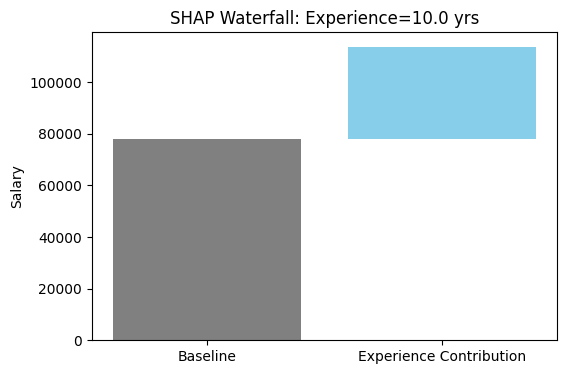

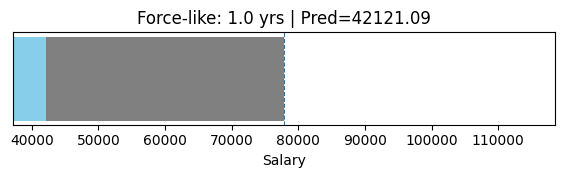

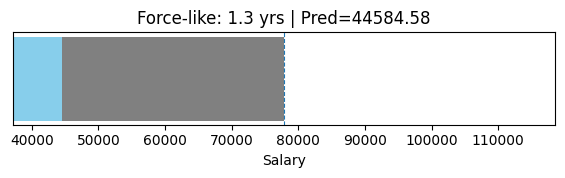

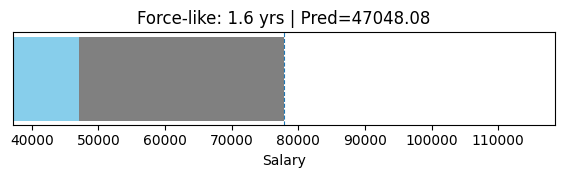

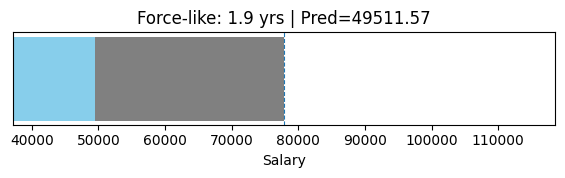

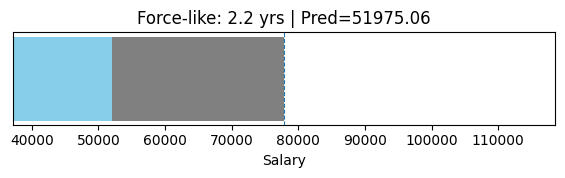

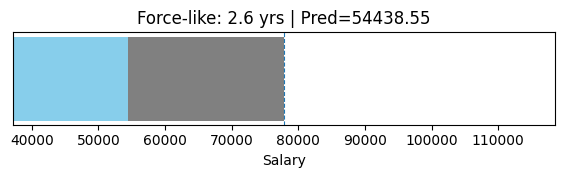

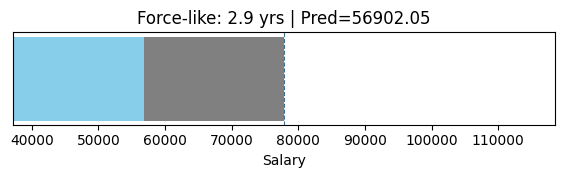

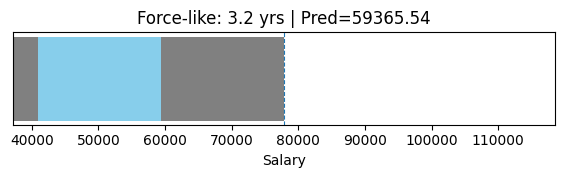

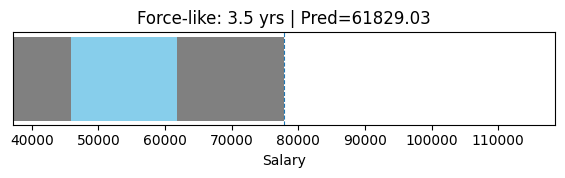

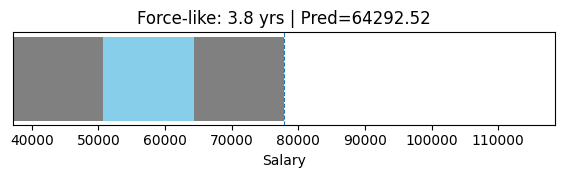

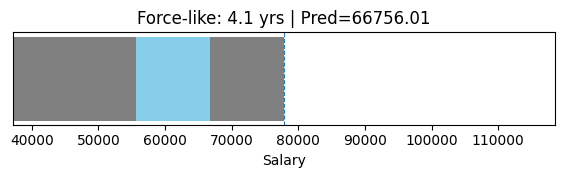

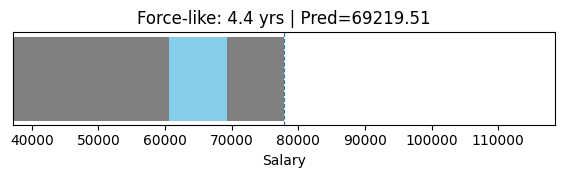

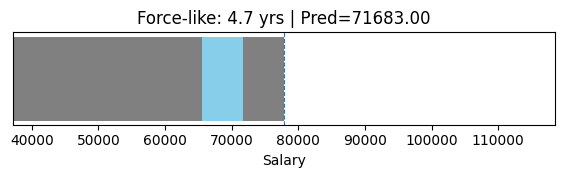

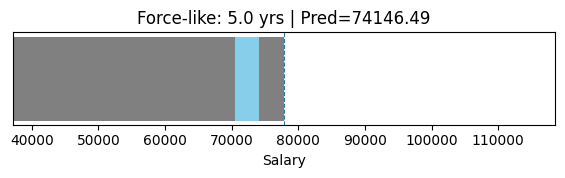

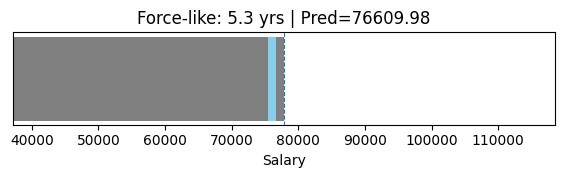

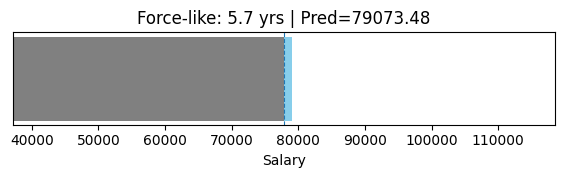

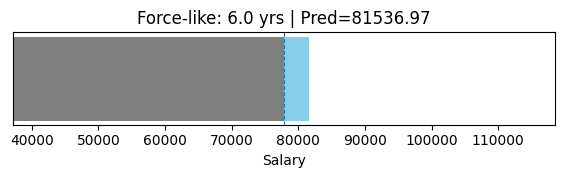

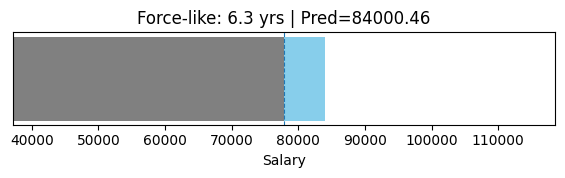

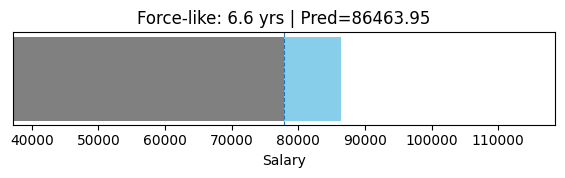

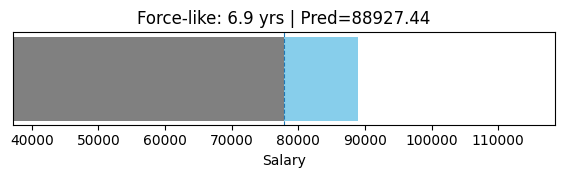

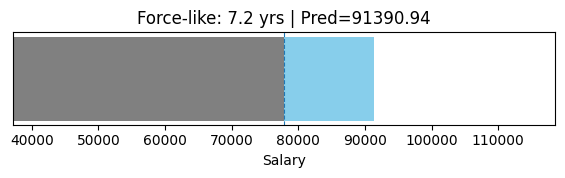

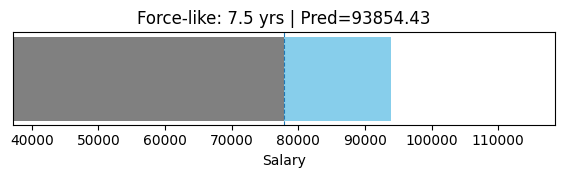

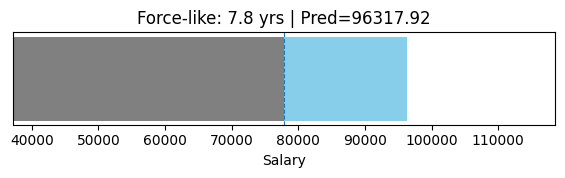

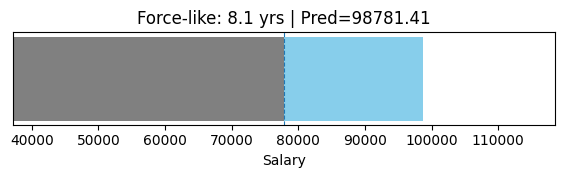

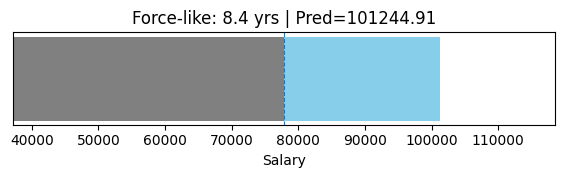

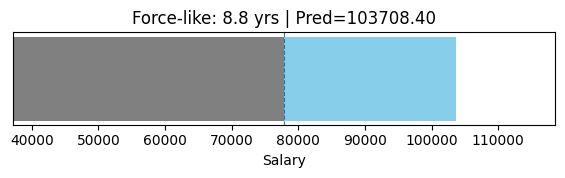

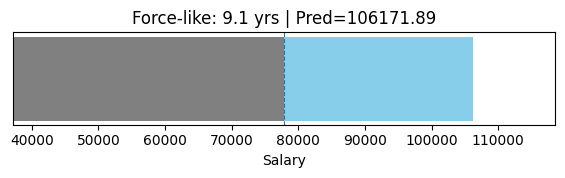

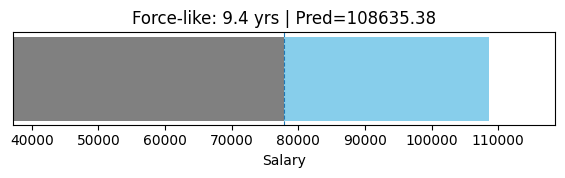

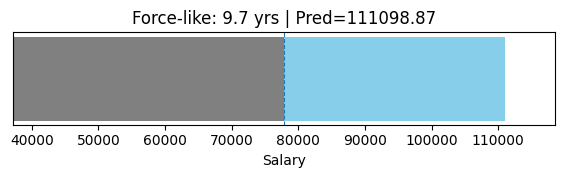

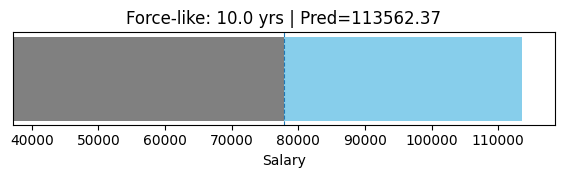

Linear Model Equation: Salary = intercept + slope * YearsExperience
  intercept = 34183.17
  slope     = 7937.92
Prediction for 3.5 yrs exp: 61965.89
Prediction for 7 yrs exp: 89748.61
Baseline (E[pred]) = 77841.73


In [25]:
# Problem 3: Predicting Employee Salary based on Years of Experience

np.random.seed(2)
YearsExperience = np.linspace(1, 10, 30)
Salary = 35000 + 8000*YearsExperience + np.random.normal(0, 3500, size=30)

df3 = pd.DataFrame({
    "YearsExperience": YearsExperience,
    "Salary": Salary
})

display(df3)
model3 = LinearRegression()
model3.fit(df3[["YearsExperience"]], df3["Salary"])
slope3 = float(model3.coef_[0])
intercept3 = float(model3.intercept_)

pred_3_5 = model3.predict([[3.5]])[0]
pred_7 = model3.predict([[7]])[0]

mean_exp = df3["YearsExperience"].mean()
baseline3 = intercept3 + slope3*mean_exp
shap_exp = slope3 * (df3["YearsExperience"] - mean_exp)
predictions3 = baseline3 + shap_exp

results3 = df3.copy()
results3["Predicted"] = predictions3
results3["SHAP_Experience"] = shap_exp
results3["Baseline"] = baseline3

display(results3)

idx_wf3 = df3["YearsExperience"].idxmax()
fig, ax = plt.subplots(figsize=(6,4))
parts = [baseline3, shap_exp[idx_wf3]]
labels = ["Baseline", "Experience Contribution"]
current_val = baseline3
ax.bar(0, baseline3, color="gray")
ax.bar(1, shap_exp[idx_wf3], bottom=baseline3, color="skyblue")
ax.set_xticks([0,1])
ax.set_xticklabels(labels)
ax.set_ylabel("Salary")
ax.set_title(f"SHAP Waterfall: Experience={df3.loc[idx_wf3,'YearsExperience']:.1f} yrs")
plt.show()

for idx in range(len(df3)):
    fig, ax = plt.subplots(figsize=(7,1.2))
    ax.barh(0, baseline3, height=0.4, color="gray")
    ax.barh(0, shap_exp[idx], left=baseline3 if shap_exp[idx]>=0 else baseline3+shap_exp[idx], height=0.4, color="skyblue")
    ax.axvline(baseline3, linestyle="--", linewidth=0.8)
    ax.set_xlim(min(baseline3+shap_exp.min(), baseline3)-5000, max(baseline3+shap_exp.max(), baseline3)+5000)
    ax.set_yticks([])
    ax.set_xlabel("Salary")
    ax.set_title(f"Force-like: {df3.loc[idx,'YearsExperience']:.1f} yrs | Pred={predictions3[idx]:.2f}")
    plt.show()
print("Linear Model Equation: Salary = intercept + slope * YearsExperience")
print(f"  intercept = {intercept3:.2f}")
print(f"  slope     = {slope3:.2f}")
print(f"Prediction for 3.5 yrs exp: {pred_3_5:.2f}")
print(f"Prediction for 7 yrs exp: {pred_7:.2f}")
print(f"Baseline (E[pred]) = {baseline3:.2f}")

4.problem

Linear Model: Sales = 4803.68 + (10.88 * Intelligence) + (-10.28 * Extroversion)
Prediction (Int=100, Ext=25): 5634.42
Prediction (Int=120, Ext=18): 5923.91


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


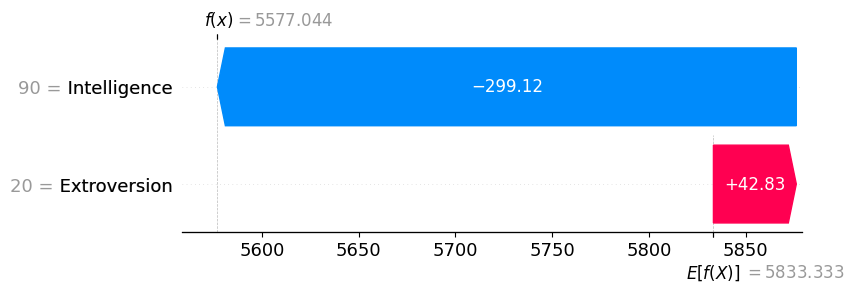

/tmp/ipython-input-2381060246.py:41: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


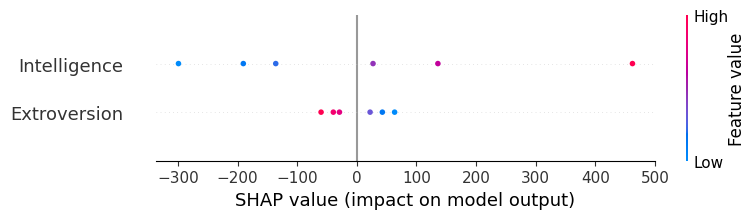

In [26]:
# Problem 4: Predicting Sales Performance Using Intelligence & Extroversion
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

data = {
    "Intelligence": [90, 120, 100, 130, 160, 105],
    "Extroversion": [20, 27, 18, 30, 22, 28],
    "Sales": [5000, 6200, 5400, 4000, 6900, 7500]
}
df = pd.DataFrame(data)

X = df[["Intelligence", "Extroversion"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_intelligence = model.coef_[0]
coef_extroversion = model.coef_[1]

print(f"Linear Model: Sales = {intercept:.2f} + ({coef_intelligence:.2f} * Intelligence) + ({coef_extroversion:.2f} * Extroversion)")

pred1 = model.predict([[100, 25]])[0]
pred2 = model.predict([[120, 18]])[0]
print(f"Prediction (Int=100, Ext=25): {pred1:.2f}")
print(f"Prediction (Int=120, Ext=18): {pred2:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
plt.show()

shap.plots.force(explainer.expected_value, shap_values.values, X)
plt.show()

shap.summary_plot(shap_values, X)


5.problem

Linear Model: Sales = 46.74 + (0.61 * Facebook) + (0.67 * Newspaper)
Prediction (Facebook=50, Newspaper=70): 123.96
Prediction (Facebook=25, Newspaper=30): 82.01


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


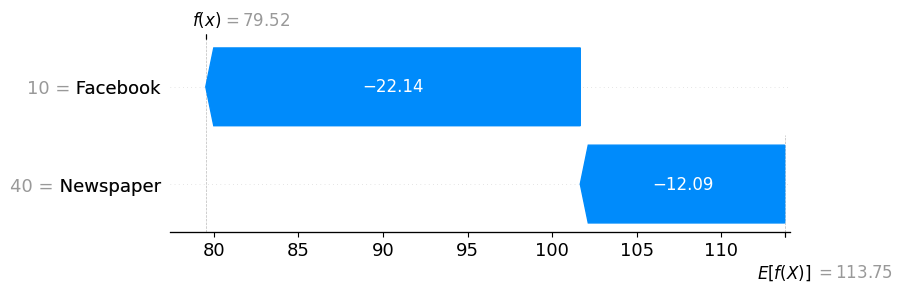

/tmp/ipython-input-700310016.py:41: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


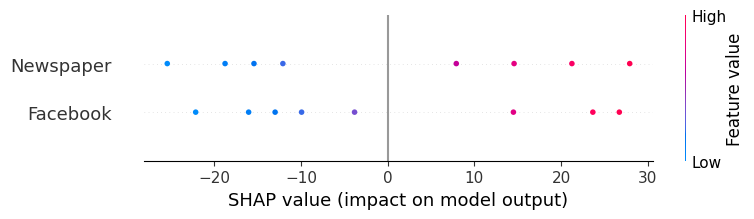

In [27]:
# Problem 5: Predicting Sales Based on Facebook & Newspaper Ad Spend
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import shap
import matplotlib.pyplot as plt

data = {
    "Facebook":   [10, 30, 40, 90, 70, 20, 85, 25],
    "Newspaper":  [40, 20, 70, 80, 90, 30, 100, 35],
    "Sales":      [80, 100, 120, 140, 150, 90, 180, 50]
}
df = pd.DataFrame(data)

X = df[["Facebook", "Newspaper"]]
y = df["Sales"]

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coef_fb = model.coef_[0]
coef_news = model.coef_[1]

print(f"Linear Model: Sales = {intercept:.2f} + ({coef_fb:.2f} * Facebook) + ({coef_news:.2f} * Newspaper)")

pred1 = model.predict([[50, 70]])[0]
pred2 = model.predict([[25, 30]])[0]
print(f"Prediction (Facebook=50, Newspaper=70): {pred1:.2f}")
print(f"Prediction (Facebook=25, Newspaper=30): {pred2:.2f}")

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

shap.plots.waterfall(shap_values[0])
plt.show()

shap.plots.force(explainer.expected_value, shap_values.values, X)
plt.show()

shap.summary_plot(shap_values, X)